# CS512– Artificial Intelligence

##Lab Assignment - 2 | Due on 10th-March-2022   2400 Hrs     (150 Marks)


**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Armaan Garg, armaan.19CSZ0002@iitrpr.ac.in
*   Shivam Kainth shivam.20csz0006@iitrpr.ac.in

Your submission must be your original work. **Do not indulge in any kind of plagiarism or copying**. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment1 then you should name the colab file as: ABC_2019csx1234_Lab1.ipynb


# Problem 1: The Last Stone Game

The Last Stone is a two player game played over a square grid with stone pebbles of two colours (one for each player). A player is allowed to either place **one** stone or **two** stones in a single play onto the grid. The player who puts **the Last Stone** on the grid **wins** the game. There are some blocked cells in the grid that cannot be used by either players to place any stone. 

Let us assume that you are one of the players and your aim is to win the game (there are only two payoff values possible - +1 for win and -1 for loss). You must have guessed by now that you can be generate your best strategy in this game with the help of Minimax algorithm. 

Information about Minimax:

* Minimax algorithm is a recursive or backtracking algorithm which is used in decision-making and game theory.
* It provides an optimal move for the player assuming that opponent is also playing optimally.
* Minimax algorithm uses recursion to search through the game-tree.
* Minimax algorithm is mostly used for game playing in AI such as Chess, Checkers, tic-tac-toe, Go, and various tow-player games. This algorithm computes the minimax decision for the current state.




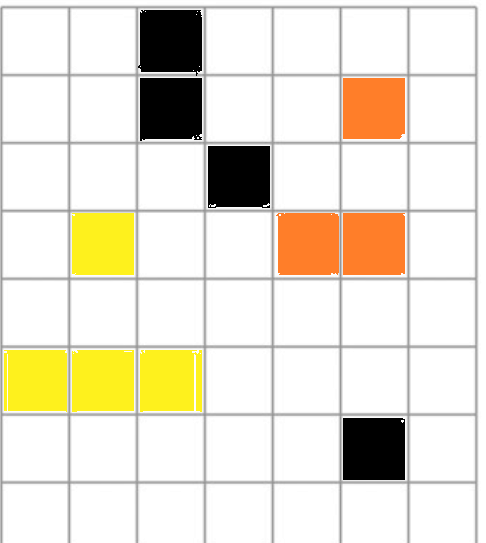


In this image, Red cells denote Player One, Yellow denotes Player Two and Black cells are blocked cells. In current scenario, player yellow has made four moves and now its the Red player's turn.

# Questions
Q.1: Find the best strategy using Minimax algorithm in 5x5 grid with one blocked location. Print the moves in the best strategy. **[10 Marks]**

Q.2: Implement $\alpha - \beta$ pruning to the Minimax algorithm to find the best strategy in 5x5 grid with one blocked location. Print the moves in the best strategy. Comment on the savings achieved with $\alpha - \beta$ pruning as compared to Minimax algorithm in Q.1 **[10 Marks]**

Q.3: Let us assume that the decision on whether a player can place 1 stone or 2 stones is decided based on the toss of a coin. If Head comes then the player can place only 1 stone while a Tail on the coin flip will allow the player to place 2 stones. Find your best strategy in this version of the game using Expecti-Minimax in 5x5 grid with one blocked location. **[15 Marks]**

Q.4: Experiment and analyze the effect of increasing the number of blocked cells from 1 to 5 on the performance of above algorithms (in terms of time, number of nodes explored, size of game tree). **[15 Marks]**


Plot graphs to compare the performance in Q.3 and Q.4

[Bonus] Implement a visualization (GUI) of this game and try to play against your coded algorithms. Report your experience and findings.  **[20 Marks]**

### Input to the program: Grid world and cell's location which are blocked. 
#### Output of the program: (0 or 1), 0 denotes player 1 loses, 1 denotes player 1 wins. 

**Sample code for the Last Stone game**

In [ ]:
import numpy  as np
from sys import maxsize
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Basic Grid world structure is defined here
def begin_game(number_of_blocked_state=1):
#   global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(number_of_blocked_state):
    blockedx=np.random.randint(0,5)
    blockedy=np.random.randint(0,5)
    world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
  
  return world

# begin_game()
# world



In [ ]:
MAX_PLAYER = +1
MIN_PLAYER = -1
CHANCE_NODE = 0
# choices = [1,2]
options = [1,2]
MAX_BLOCKED_CELL_COUNT = 5

In [ ]:
def eval_utility(state, player):
    if(state == 0):                     
        if(-player == MAX_PLAYER):
            return +1
        else:
            return -1
    elif(state < 0):                     
        if(-player == MAX_PLAYER): 
            return -1  
        else:
            return +1
    else:
        return 0 

In [ ]:

explored_nodes_expecti_minimax = [0]*MAX_BLOCKED_CELL_COUNT
def expecti_minimax(state,player,blocked_cell_count):

    explored_nodes_expecti_minimax[blocked_cell_count-1]+=1
    # print('calling expectiminimax')
    if(state <= 0): # Base case that will end recursion
        return [eval_utility(state, player), 0] # We really do not care on the move at this point
        # return eval_utility(state,player)

    possible_options=[]
    if (player == MAX_PLAYER): 
        # best_value=-maxsize
        alpha = -maxsize
        for i in range(len(options)): 

            score, move = expecti_minimax(state - options[i], CHANCE_NODE,blocked_cell_count)
            possible_options.append(score)
            alpha = max(alpha,score)
            # alpha = max(alpha,expecti_minimax(state - options[i], -player))

        score = alpha
        move = [i for i, value in enumerate(possible_options) if value == score]
        return [score, move[0]]

    elif player == MIN_PLAYER:
        alpha=maxsize
        sum = 0
        for i in range(len(options)): # for every availiable choice/branch of the tree 1, 2 ή K

            score, move = expecti_minimax(state - options[i], CHANCE_NODE,blocked_cell_count)
            
            possible_options.append(score)
            alpha = min(alpha,score)

        score = alpha
        move = [i for i, value in enumerate(possible_options) if value == score]
        return [score, move[0]]

    else:
        alpha = 0
        for i in range(len(options)):
            
            score,move = expecti_minimax(state -options[i], -player,blocked_cell_count )

            alpha = alpha + 0.5 * score
            possible_options.append(alpha)

        score = alpha
            
        move = [i for i, value in enumerate(possible_options) if value == score]
        return [score, move[0]] 
    
    # print('alpha = ',alpha)

    # return alpha


In [ ]:
explored_nodes_minimax_alphabeta = [0]*MAX_BLOCKED_CELL_COUNT
def minimax_alphabeta(state,player,blocked_cell_count,alpha,beta):
    explored_nodes_minimax_alphabeta[blocked_cell_count-1]+= 1
    if(state <= 0): # Base case that will end recursion
        return [eval_utility(state, player),0] # We really do not care on the move at this point
    
    possible_options=[]
    if (player == MAX_PLAYER): 
        best_value=-maxsize
        for i in range(len(options)): # for every availiable choice/branch of the tree 1, 2 ή K
            score, move = minimax_alphabeta(state - options[i], -player,blocked_cell_count,alpha,beta)
            possible_options.append(score)
            
            best_value = max(best_value, score)
            alpha = max(alpha, best_value)
            if beta <= alpha:
                #print("for max player: ",alpha,beta)
                break
        score = best_value
        move = [i for i, value in enumerate(possible_options) if value == score]
        return [score, move[0]]
    else:
        best_value=maxsize
        for i in range(len(options)): # for every availiable choice/branch of the tree 1, 2 ή K
            score, move = minimax_alphabeta(state - options[i], -player,blocked_cell_count,alpha,beta)
            possible_options.append(score)
            best_value = min(best_value, score)
            beta = min(beta, best_value)
            if beta <= alpha:
                #print("for min player: ",alpha,beta)
                break
        score = best_value
        move = [i for i, value in enumerate(possible_options) if value == score]
        return [score, move[0]]

In [ ]:
explored_nodes_minimax = [0]*MAX_BLOCKED_CELL_COUNT
def minimax(state, player,blocked_cell_count):
    explored_nodes_minimax[blocked_cell_count-1] += 1
    if(state <= 0): # Base case that will end recursion
        return [eval_utility(state, player), 0] # We really do not care on the move at this point
        # return eval_utility(state, player), 0
    possible_options=[]
    for i in range(len(options)): # for every availiable choice/branch of the tree 1, 2 ή K
        score, move = minimax(state - options[i], -player,blocked_cell_count) # Again we dont care on the move here
        # print('score',score)
        # print('move',move)
        possible_options.append(score)
    if (player == MAX_PLAYER): 
        score = max(possible_options)
        move = [i for i, value in enumerate(possible_options) if value == score]
        # move list consists of all indexes where min or max shows up but we will 
        # use only the 1st one. 
        # print('score',score)
        # print('move',move)
        return [score, move[0]]
    else:
        score = min(possible_options)
        move = [i for i, value in enumerate(possible_options) if value == score]
        return [score, move[0]]

In [ ]:
def p1_choice(emptycells,algo,blocked_cell_count):
  ##########
  #your code goes here.
  # this min_max function return a choice to either put 1 marble or two marbles on the grid for player 1 .
  ##########
    # move = -1
    if algo == 'minimax': 
        score,move = minimax(emptycells,MAX_PLAYER,blocked_cell_count)
        print('player1 choice = ',options[move])
        return options[move]
    elif algo == 'minimax_alphabeta':
        score,move = minimax_alphabeta(emptycells,MAX_PLAYER,blocked_cell_count,-maxsize,maxsize)
        print('player1 choice = ',options[move])
        return options[move]
    elif algo == 'expecti_minimax':
        score,move = expecti_minimax(emptycells,MAX_PLAYER,blocked_cell_count)
        print('player1 choice = ',options[move])
        return options[move]
    else: return 'invalid algo'

    

In [ ]:
def p2_choice(emptycells,algo,blocked_cell_count):
  ##########
  #your code goes here.
  # this min_max function return a choice to either put 1 marble or two marbles on the grid for player 2.
  ########## 
    
    if algo == 'minimax':
        score,move = minimax(emptycells,MIN_PLAYER,blocked_cell_count)
        print('player2 choice = ', options[move])
        return options[move]
    elif algo == 'minimax_alphabeta':
        score,move = minimax_alphabeta(emptycells,MIN_PLAYER,blocked_cell_count,-maxsize,maxsize)
        print('player2 choice = ', options[move])
        return options[move]

    else:

        score,move = expecti_minimax(emptycells,MIN_PLAYER,blocked_cell_count)
        print('player2 choice = ', options[move])
        return options[move]

In [ ]:
def gameplay(world, algo, turn, blocked_cell_count):

    player1_choices = []
    player2_choices = []

# retuns number of empty cells in the world.
    emptycells = np.count_nonzero(world == 0)
#   print('emptycells = ',emptycells)
    while(emptycells):

        # define this function to return the choice for number of marbles to be put by player one
        player1 = p1_choice(emptycells, algo, blocked_cell_count)
        player1_choices.append(player1)
        # player2=p2_choice(emptycells) #define this function to return the choice for number of marbles to be put by player two.
        # remember the allowed choices for both are 1 marbles or 2 marbles.
        # valid positions where marbles can be placed
        emptypos = np.where(world == 0)
        # print('emptypos',emptypos)
        # return a list of coordinated wheere board is empty
        allowedpos = list(zip(emptypos[0], emptypos[1]))
        # print(allowedpos)
        if(player1 == 1):
            # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
            world[allowedpos[0][0]][allowedpos[0][1]] = 1
            allowedpos.pop(0)
        #   print(len(allowedpos))

        elif(player1 == 2):
            # player 1 has chosen to put two sticks, hence we put "1" at two positions
            # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
            world[allowedpos[0][0]][allowedpos[0][1]] = 1
            allowedpos.pop(0)  # removes first ovvupied postion form the list.
            # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
            world[allowedpos[0][0]][allowedpos[0][1]] = 1
            allowedpos.pop(0)
        # emptypos=np.where(world == 0)# valid positions where marbles can be placed

        # allowedpos=list(zip(emptypos[0],emptypos[1]))# return a list of coordinated wheere board is empty
        # emptycells=np.count_nonzero(world==0)
        emptycells = emptycells - player1
        print('emptycells after p1', emptycells)
        turn = 1
        # print(allowedpos)
        print(world)
        if(emptycells == 0):
            print('end turn = ', turn)
            break
        # player 2's turn
        # define this function to return the choice for number of marbles to be put by player two.
        player2 = p2_choice(emptycells, algo, blocked_cell_count)
        player2_choices.append(player2)
        if(player2 == 1):
            # sets first available allowed position to 2(2 denotes player 1 has placed it's marble there)
            world[allowedpos[0][0]][allowedpos[0][1]] = 2
            allowedpos.pop(0)
        else:
            # player 2 has chosen to put two sticks, hence we put "2" at two positions
            # sets first available allowed position to 2(2 denotes player 2 has placed it's marble there)
            world[allowedpos[0][0]][allowedpos[0][1]] = 2
            allowedpos.pop(0)
            world[allowedpos[0][0]][allowedpos[0][1]] = 2
            allowedpos.pop(0)

        # emptycells=np.count_nonzero(world==0)
        emptycells = emptycells - player2
        # print('emptycells after p2',emptycells)
        # print(allowedpos)
        print(world)
        turn = 2
        if(emptycells == 0):
            print('end  turn = ', turn)
            break
        # emptycells=np.count_nonzero(world==0)
        node_count = 0
        if algo == 'minimax':
            node_count = explored_nodes_minimax[blocked_cell_count-1]
        elif algo == 'minimax_alphabeta':
            node_count = explored_nodes_minimax_alphabeta[blocked_cell_count-1]
        elif algo == 'expecti_minimax':
            node_count = explored_nodes_expecti_minimax[blocked_cell_count-1]
        else: node_count = -1

    return player1_choices, player2_choices, turn, node_count



In [ ]:
blocked_cell_count = 1
world = begin_game(blocked_cell_count)   
world_1 = world.copy()
world_2 = world.copy()
world_3 = world.copy()

In [ ]:
player1_moves, player2_moves,turn,node_count  = gameplay(world_1,'minimax',0,blocked_cell_count)
print('player1_moves',player1_moves)
print('player2_moves',player2_moves)
print(turn)
print("player-",turn," wins")
if turn == 2: 
    print('output = 0')
else: print('output = 1')

print('explored_nodes in minimax ',explored_nodes_minimax[0])

player1 choice =  1
emptycells after p1 23
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 20
[[1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 17
[[1. 2. 2. 1. 2.]
 [2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 14
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 1.]
 [2. 2. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1


In [ ]:
player1_moves,player2_moves,turn,node_count = gameplay(world_2,'minimax_alphabeta',0,blocked_cell_count)
print('player1_moves',player1_moves)
print('player2_moves',player2_moves)
print(turn)
print("player-",turn," wins")
if turn == 2: 
    print('output = 0')
else: print('output = 1')
print('explored_nodes in minimax alphabeta ',explored_nodes_minimax_alphabeta[0])



player1 choice =  1
emptycells after p1 23
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 20
[[1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 17
[[1. 2. 2. 1. 2.]
 [2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 14
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 1.]
 [2. 2. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1


In [ ]:
player1_moves,player2_moves,turn,node_count = gameplay(world_3,'expecti_minimax',0,blocked_cell_count)
print('player1_moves',player1_moves)
print('player2_moves',player2_moves)
print(turn)
print("player-",turn," wins")
if turn == 2: 
    print('output = 0')
else: print('output = 1')
print('explored_nodes in expectiminimax',explored_nodes_expecti_minimax[0])

player1 choice =  1
emptycells after p1 23
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  1
[[1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 21
[[1. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  1
[[1. 2. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 19
[[1. 2. 1. 2. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  1
[[1. 2. 1. 2. 1.]
 [2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 17
[[1. 2. 1. 2. 1.]
 [2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  1
[[1. 2. 1. 2. 1.]
 [2. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1


Variaition with Number Of blocked cells 

In [ ]:

from timeit import default_timer as timer
no_of_blocked_cells = [1,2,3,4,5]
algo_names = [ 'minimax', 'minimax_alphabeta', 'expecti_minimax' ]

time_taken = []
algos = []
explored_nodes = []
num_blocked_cells = []
winning_player = []
tree_size=[]
for i in no_of_blocked_cells:
    world = begin_game(i)
    # world_1 = world.copy()
    # world_2 = world.copy()
    # world_3 = world.copy()
    for algo in algo_names:
        world_copy = world.copy()
        time_start = timer()
        player1_moves,player2_moves,turn,node_count = gameplay(world_copy,algo,0,i)
        time_end = timer()
        
        num_blocked_cells.append(i)
        time_taken.append(time_end - time_start)
        algos.append(algo)
        explored_nodes.append(node_count)
        winning_player.append(turn)
        tree_size.append(len(player1_moves) + len(player2_moves) )

        # time_taken['explored_nodes'] =  





player1 choice =  1
emptycells after p1 23
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 20
[[1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 17
[[1. 2. 2. 1. 2.]
 [2. 1. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1
emptycells after p1 14
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 1.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player2 choice =  2
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 1.]
 [2. 5. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
player1 choice =  1


In [ ]:
df = pd.DataFrame({ 'Blocked Cells': num_blocked_cells, 'Time_taken': time_taken, 'Algos' : algos, 'Explored Nodes': explored_nodes , 'Winning Player': winning_player , 'Tree Size': tree_size })

df.head(15)

,Blocked Cells,Time_taken,Algos,Explored Nodes,Winning Player,Tree Size
0,1,0.684611,minimax,1028402,2,16
1,1,0.129362,minimax_alphabeta,121121,2,16
2,1,0.902297,expecti_minimax,1271176,2,24
3,2,0.387278,minimax,271418,1,15
4,2,0.100877,minimax_alphabeta,36876,1,15
5,2,0.445201,expecti_minimax,300064,2,22
6,3,0.323801,minimax,214104,1,15
7,3,0.067627,minimax_alphabeta,29723,1,15
8,3,0.388986,expecti_minimax,242750,2,22
9,4,0.191453,minimax,121360,2,14


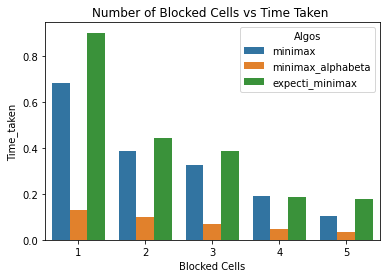

In [ ]:
import seaborn as sns

ax = sns.barplot(x=df['Blocked Cells'],y=df['Time_taken'], hue=df['Algos'])
plt.title("Number of Blocked Cells vs Time Taken ")
plt.show()

# Result and Observations:

* Minimax alphabeta has the lowest execution time as compared to others.
* Minimax algorithm grows completely tree based on all possible moves so it will take much time compared alpha beta pruning.
* Expecti minimax algorithm in each turn choose random moves which makes large tree for a single problem instance and also has overhead of calculating chance node values. So it has the highest execution time compared to other two algorithm.

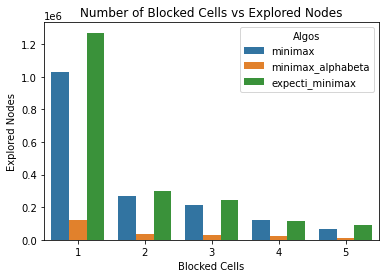

In [ ]:
ax = sns.barplot(x=df['Blocked Cells'],y=df['Explored Nodes'], hue=df['Algos'])
plt.title("Number of Blocked Cells vs Explored Nodes")
plt.show()

# Result and Observations:

* Number of nodes explored is less in minimax alphabeta as compared to others because it pruns the unnecessary nodes.
* Expecti minimax creates tree based on random moves and takes the best solution depending upon the values of chance nodes. 
* Explored Nodes are higher in case of expecti minimax due to presence of chance nodes.

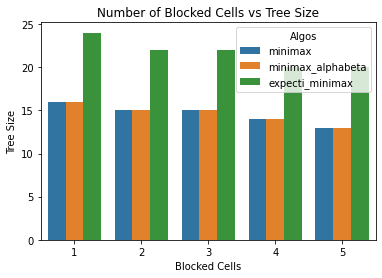

In [ ]:
ax = sns.barplot(x=df['Blocked Cells'],y=df['Tree Size'], hue=df['Algos'])
plt.title("Number of Blocked Cells vs Tree Size")
plt.show()

# Result and Observations:

* As block cell increased minimax and minimax alphabeta has no change in tree size or almost same but expecti minimax tree size reduced as compared to other overall states are reduced.

# Problem 2: Solving Vehicle Routing Problem

Imagine you are running a logistics company using a single transport lorry. Your daily task involves scheduling deliveries for various customers spread across the city at different locations. Since, you always want to have the best customer feedback to grow your business, your aim is to perform all the deliveries to all the customers in the least possible time (this will also save your fuel cost). 

You also plan to use your AI expertise in your work, hence you plan to use Genetic Algorithm (GA) to find the best route across the city to perform the deliveries.

#### Typical GA flow:
1. Initialize a population.
2. Determine the fitness of all the individuals in the population.
3. Until **Done** repeat:
    1. Select parents.
    2. Perform crossover and mutation.
    3. Calculate the fitness of the new children.
    4. Append it to the gene pool.

## Questions
Five sets of problem instances each having 25 customer locations (X,Y) are provided for your implementation. Consider that it takes 1 unit of time to travel a unit distance.

Download Problem Instances: [routes.csv](https://drive.google.com/file/d/1JWLffb_5eJyiML81VtJF8ISV2le4QxMC/view?usp=sharing)

**Question 1**: Implement GA to find the most optimal route of customer deliveries with crossover probability as 0.5 and mutaion probability as 0.01 with a population size of 20. Operators to be used: [**20 marks**]
* Selection: Tournament selection
* Crossover: Partially Mapped Crossover (PMX) (to know more [click here](http://www.wardsystems.com/manuals/genehunter/crossover_of_enumerated_chromosomes.htm))
* Mutation: Single point mutation
Make your own decisions on the number of generation and report the same.
Print the fitness and the best route for all the problem instances. 

**Question 2**: Analyze the effect of increasing the crossover probability from the set - {0.5,0.6,0.7,0.8,0.9} and plot the fitness of the best solution for all the problem instances. Comment on the effect of crossover probability on GA performance. [**15 Marks**]

**Question 3**: Analyze the effect of increasing the mutation probability from the set -  {0.01,0.02,0.03,0.05,0.07} and plot the fitness of the best solution for all the problem instances. Comment on the effect of mutation probability on GA performance. [**15 Marks**]




### Hint
Take the sequence of points travelled by the vehicle as a chromosome.
Here the length of chromeosome will be 25 for all input instances. If the agent took path as 1,2,3,5,4,6,..... the chromosome will be of same sequence i.e. [1|2|3|5|4|6|....].
These chromosomes will then crossover and mutate accordingly and will produce new chromosomes with slightly altered sequencess.
Use fitness function to decide the fitness/suitability of a particular chromeosome and then repeat the experiment until the distance travelled by the sequence is low.

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

Mounted at /content/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy
import operator
import random
df = pd.read_csv('/content/MyDrive/MyDrive/Colab Notebooks/routes_samples.csv')

df.head()

,T1:XCOORD.,T1: YCOORD.,Unnamed: 2,T2: XCOORD.,T2: YCOORD.,Unnamed: 5,T3: XCOORD.,T3: YCOORD.,Unnamed: 8,T4:XCOORD.,T4: YCOORD.,Unnamed: 11,T5:XCOORD.,T5: YCOORD.
0,40,50,NaN,20,55,NaN,35,35,NaN,40,50,NaN,88,30
1,45,68,NaN,10,35,NaN,41,49,NaN,25,85,NaN,88,35
2,45,70,NaN,10,40,NaN,35,17,NaN,22,75,NaN,87,30
3,42,66,NaN,8,40,NaN,55,45,NaN,22,85,NaN,85,25
4,42,68,NaN,8,45,NaN,55,20,NaN,20,80,NaN,85,35


In [ ]:
df = df.dropna(axis=1, how='all')
df.shape
df.head(5)

,T1:XCOORD.,T1: YCOORD.,T2: XCOORD.,T2: YCOORD.,T3: XCOORD.,T3: YCOORD.,T4:XCOORD.,T4: YCOORD.,T5:XCOORD.,T5: YCOORD.
0,40,50,20,55,35,35,40,50,88,30
1,45,68,10,35,41,49,25,85,88,35
2,45,70,10,40,35,17,22,75,87,30
3,42,66,8,40,55,45,22,85,85,25
4,42,68,8,45,55,20,20,80,85,35


In [ ]:
columns = df.keys()

problem_instances = []

for i in range(0,len(columns)-1,2):    
    problem_instances.append(list(zip(df[columns[i]],df[columns[i+1]])))

print(problem_instances)
print('len',len(problem_instances))

[[(40, 50), (45, 68), (45, 70), (42, 66), (42, 68), (42, 65), (40, 69), (40, 66), (38, 68), (38, 70), (35, 66), (35, 69), (25, 85), (22, 75), (22, 85), (20, 80), (20, 85), (18, 75), (15, 75), (15, 80), (30, 50), (30, 52), (28, 52), (28, 55), (25, 50), (25, 52)], [(20, 55), (10, 35), (10, 40), (8, 40), (8, 45), (5, 35), (5, 45), (2, 40), (0, 40), (0, 45), (36, 18), (35, 32), (33, 32), (33, 35), (32, 20), (30, 30), (34, 25), (30, 35), (36, 40), (48, 20), (26, 32), (25, 30), (25, 35), (44, 5), (42, 10), (42, 15)], [(35, 35), (41, 49), (35, 17), (55, 45), (55, 20), (15, 30), (25, 30), (20, 50), (10, 43), (55, 60), (30, 60), (20, 65), (50, 35), (30, 25), (15, 10), (30, 5), (10, 20), (5, 30), (20, 40), (15, 60), (45, 65), (45, 20), (45, 10), (55, 5), (65, 35), (65, 20)], [(40, 50), (25, 85), (22, 75), (22, 85), (20, 80), (20, 85), (18, 75), (15, 75), (15, 80), (10, 35), (10, 40), (8, 40), (8, 45), (5, 35), (5, 45), (2, 40), (0, 40), (0, 45), (44, 5), (42, 10), (42, 15), (40, 5), (40, 15), (3

In [ ]:
def population(length_of_chromosome):
  ##### initialization function
#   length_of_chromosome=25
    # length_of_chromosome = len(instance)
    # gene="1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25"
    city_range = list(range(0, length_of_chromosome))
    random_city_order = deepcopy(city_range)
    random.shuffle(random_city_order)
    return random_city_order

In [ ]:
import random
import math
import matplotlib.pyplot as plt
# def crossover(parentx,parenty,rate):
#   #### rate defines the crossover rate
#   ##### define the crossover operator here
#   #your code goes here
#   pass

def pick_ellite_start_index(parent_length,ellite_length):
    return random.randrange(0,parent_length-ellite_length+1)

def crossover(parentx, parenty, crossover_probability):

    parent_length = len(parentx)
    ellite_length = round(len(parentx) * (1-crossover_probability))
    ellite_start_index = pick_ellite_start_index(parent_length,ellite_length)
    ellite_points = list(range(ellite_start_index,ellite_start_index+ellite_length))
    # print('ellite_points',ellite_points)

    child = [0]*parent_length
    
    

    ellite_parentx = []
    ellite_parenty = []
    parenty_dict =dict(map(reversed, enumerate(parenty)))
    for i in ellite_points:
        child[i] = parentx[i]
        ellite_parentx.append(child[i])
        ellite_parenty.append(parenty[i])
    
    ellite_diff = set(ellite_parenty)-set(ellite_parentx)
    ellite_mapping = {}

    for i in range(len(ellite_parenty)):
        ellite_mapping[ellite_parenty[i]] = ellite_parentx[i] 

    for i in (ellite_diff):
        pt = ellite_mapping[i]
        while(True):
            pos = parenty_dict[pt]
            if not child[pos]:
                child[pos]=i
                break
            pt=child[pos]

    for i in parenty_dict:
        if i not in child:
            child[parenty_dict[i]]=i
    
    return child

In [ ]:
# def mutaiton(parentx,rate):
#   ##### insert code for mutaiton operator here
#   ### remenber the mutaiton rate has to be varied for different trial runs  
#   pass

def mutate(route,probablity):
    
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swaped_along = np.random.randint(0,len(route))
            
            temp1=route[swaping_p]
            
            temp2=route[swaped_along]
            route[swaped_along]=temp1
            route[swaping_p]=temp2
    
    return route


In [ ]:
# class fitness:
#   def __init__():
#     # intitilize the self distance and fitness as 0 
#     pass
#   def distance():
#       ### take te manhatten distance between two point coordinates as the fitness funciton.
#     pass
#   def fitness():
#     pass
#     ### calculate the fitness of the route taen 


def distance(i,j):
    
    #returning distance of city i and j 
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)


def fitness(route,instance):
    '''Individual fitness of the routes is calculated here
    route= 1d array
    instance = List of the cities
    '''
    #Calculate the fitness and return it.
    score=0
    #N_=len(route)
    # print('route = ',route)
    # print('len(instance) = ',len(instance))
    # print('instance',instance)

    for i in range(1,len(route)):
        # print("i = ",i)
        k=int(route[i-1])
        l=int(route[i])

        score = score + distance(instance[k],instance[l])
        
        
    return score


In [ ]:

def populationstart(population_size,instance):
  ## generate random routes using random library
    # city_range = list(range(0, len(instance)+1))

    length_of_chromosome = len(instance)
    popul = []
    for chromosome_index in range(population_size):
        popul.append(population(length_of_chromosome))

    # print(popul)
    return popul
    

In [ ]:
# def selection(popRanked, eliteSize):
#     selectionResults=[]
#     result=[]
#     for i in popRanked:
#         result.append(i[0])
#     for i in range(0,eliteSize):
#         selectionResults.append(result[i])
    
#     return selectionResults
''' tournament selection '''
def selection(popRanked, tournament_size=16):
    
    popRanked_copy = deepcopy(popRanked)
    routes, fitness_scores = zip(*popRanked_copy)
    # print('routes',routes)

    ''' select winning player by their weighted probability of winning or fitness value'''
    tournament_contestent = random.choices( routes , weights=[100/f for f in fitness_scores], k=tournament_size)

    # print('tournament_contestent',tournament_contestent)
    
    # print('total',total)
    # print('fitness_scores',fitness_scores)
    # print('lem',len(tournament_contestent))

    return tournament_contestent

In [ ]:
def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

In [ ]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    
    
    return matingpool

In [ ]:
def breedPopulation(mating_pool,crossover_probability):
    children=[]
    for i in range(len(mating_pool)-1):
        children.append(crossover(mating_pool[i],mating_pool[i+1],crossover_probability))
    return children

In [ ]:
def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

In [ ]:
def next_generation(instance,current_population,crossover_probability,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,instance)

    # print(f"population rank : {population_rank}")/

    selection_result=selection(population_rank,elite_size)
    # print(f"selection results {selection_result}")

    mating_pool=matingPool(current_population,selection_result)
    # print(f"mating pool {mating_pool}")

    children=breedPopulation(mating_pool,crossover_probability)
    # print(f"childern {children}")

    next_generation=mutatePopulation(children,mutation_rate)
    #print(f"next_generation {next_generation}")
    return next_generation

In [ ]:
def rankRoutes(population,instance):
    # print('population',population)
    # print('instance',in)
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],instance)

    # print('fitnessResult = ',fitnessResults)
    # print('length = ',len(fitnessResults))
    # res = sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)
    # print('res = ',res)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

In [ ]:
# instance = problem_instances[0]
def runalgo(instance,population_size=20,crossover_probability=0.5,mutation_probability=0.01,tournament_size = 16,generation = 500):

    population = []
    progress = []
    best_chromosome_index = []

    population = populationstart(population_size,instance)

    fitness_result = rankRoutes(population,instance)
    progress.append(fitness_result[0][1])
    
    # print(f"initial route distance {progress[0]}")
    # print(f"initial route {population[0]}")


    for i in range(0,generation):
        pop = next_generation(instance,population,crossover_probability,mutation_probability,tournament_size)
        progress.append(rankRoutes(pop,instance)[0][1])

    rank_=rankRoutes(pop,instance)[0]

    # print(f"Best Route :{pop[rank_[0]]} ")
    # print(f"best route distance {rank_[1]}")
    # plt.plot(progress)
    # plt.ylabel('Distance')
    # plt.xlabel('Generation')
    # plt.show()
    
    return rank_, pop
    

    # for p in population:
    #     print(p)
# print('len',len(problem_instances))



In [ ]:
from timeit import default_timer as timer

fitness_instance = []
time_taken = []
for instance in problem_instances:
    time_start = timer()
    p,q = runalgo(instance)
    
    time_end = timer()
    fitness_instance.append(p[1])
    time_taken.append(time_end-time_start)

print('best_route_distance = ',fitness_instance)
print(time_taken)

best_route_distance =  [375.1271744919105, 456.8236985946169, 697.1862202855104, 766.3674012592949, 960.2655914788861]
[1.5749411840001812, 1.5667248879999534, 1.5438443969999298, 1.5639010459999554, 1.5475423339998997]


# Variation with crossover probabilities 

In [ ]:
crossover_probabilities = [ 0.5,0.6,0.7,0.8,0.9 ]

time_taken = []
fitness_instance = []
instances = []
crossover_prob = [] 
instanceId = [ 'T1','T2','T3','T4','T5' ]

POPULATION_SIZE = 20

for index,instance in enumerate(problem_instances):
    for prob in crossover_probabilities:

        time_start = timer()
        p,q = runalgo(instance,POPULATION_SIZE,prob)
        time_end = timer()      
        instances.append(instanceId[index])
        fitness_instance.append(1/p[1])
        time_taken.append(time_end-time_start)
        crossover_prob.append(prob)




In [ ]:
crossover_df = pd.DataFrame({ 'InstanceId': instances ,'Fitness': fitness_instance, 'Time_taken': time_taken,
                    'Crossover Probability' : crossover_prob 
                })

crossover_df.head(15)


,InstanceId,Fitness,Time_taken,Crossover Probability
0,T1,0.002635,1.575390,0.5
1,T1,0.002673,1.570861,0.6
2,T1,0.002732,1.571723,0.7
3,T1,0.002844,1.583129,0.8
4,T1,0.002388,1.541657,0.9
5,T2,0.002221,1.567548,0.5
6,T2,0.002240,1.548749,0.6
7,T2,0.002070,1.549496,0.7
8,T2,0.001889,1.548531,0.8
9,T2,0.002297,1.527590,0.9


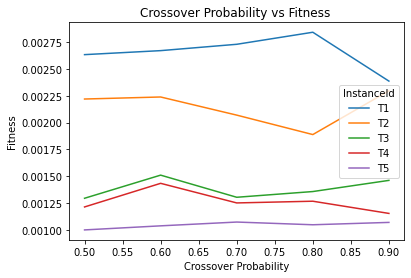

In [ ]:
import seaborn as sns

ax = sns.lineplot(x=crossover_df['Crossover Probability'],y=crossover_df['Fitness'], hue=crossover_df['InstanceId'])
plt.title("Crossover Probability vs Fitness ")
plt.show()

# def plotgraph():
#   ### use this function toplot the graph for the fitness funciton over time.
  

    
#   pass

# plotgraph()

# Result & Observations: 

* It can be inferred from the plot that it may or may not have a positive effect due to specific nature of the problem. Lower the crossover probability will let more individuals continue in the next generation unchanged.

* Here for instance T1,T3,T5 it fitness value decreases but for T2 and T4 fitness value increases while increase in crossover probability but later effect is reversed.

* It shows some erratic behaviour as for some probability it may lower the fitness value but for others will increase.

* from above instances from 0.7 to 0.8 fitness value increased for 4 instances.

# Variation with Mutation probabilities 

In [ ]:
mutation_probabilities = [ 0.01,0.02,0.03,0.05,0.07 ]

time_taken = []
fitness_instance = []
instances = []
mutation_prob = [] 
instanceId = [ 'T1','T2','T3','T4','T5' ]

POPULATION_SIZE = 20
CROSSOVER_PROBABILITY = 0.5

for index,instance in enumerate(problem_instances):
    for prob in mutation_probabilities:

        time_start = timer()
        p,q = runalgo(instance,POPULATION_SIZE,CROSSOVER_PROBABILITY,prob)
        time_end = timer()      
        instances.append(instanceId[index])
        fitness_instance.append(1/p[1])
        time_taken.append(time_end-time_start)
        mutation_prob.append(prob)

In [ ]:
mutation_df = pd.DataFrame({ 'InstanceId': instances ,'Fitness': fitness_instance, 'Time_taken': time_taken,
                    'Mutation Probability' : mutation_prob 
                })

mutation_df.head(5)

,InstanceId,Fitness,Time_taken,Mutation Probability
0,T1,0.002403,2.252842,0.01
1,T1,0.002458,1.586740,0.02
2,T1,0.002612,1.564466,0.03
3,T1,0.002638,1.634163,0.05
4,T1,0.002482,1.666254,0.07


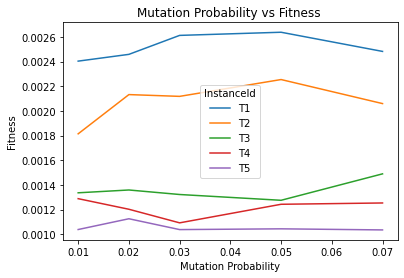

In [ ]:
# ax = sns.barplot(x=crossover_df['Mutation Probability'],y=crossover_df['Fitness'], hue=crossover_df['InstanceId'])
ax = sns.lineplot(x=mutation_df['Mutation Probability'],y=mutation_df['Fitness'], hue=mutation_df['InstanceId'])
plt.title("Mutation Probability vs Fitness ")
plt.show()

# Result & Obsertions:

* It can be inferred from the plot that increasing the mutation rate will result in decrease in fitness score for most of the instances. Due to randomize behaviour it is difficult to predict 
the exact behaviour. 

* Mutation rate determines the number of chromosomes that will be mutated in one generation and try to prevent the genetic algorithm from converging to local optima. with lower mutation rate better fitness value denotes the purity of chromosomse also.



# Problem 3: Solving the Wordoku puzzle
In this problem, you will design an AI agent to solve the Wordoku puzzle. The core technique to focus on is the Constraint Satisfaction Problem (CSP). You will be implementing two methods to solve the Wordoku puzzle and compare the implementations. Wordoku is an extension of Sudoku
where we have alphabets in place of digits. Some basics about the CSP approach for solving the same
are given below. \

**Puzzle Background** \
The Wordoku puzzle has a 9x9 grid and a set of possible alphabets
with some of the positions filled with those alphabets to ensure a
solution can be reached. The goal is to find and fill remaining cells
with alphabets such that each row, column and the 3x3 square
(sub-grid) all must contain the alphabets, exactly once.
Note: There are exactly nine alphabets among which one of the
characters is needed to be filled in blank space.

Helping note:
Check the Alldiff constraints as discussed for the Sudoku puzzle.


The aim is to choose a value for each variable such that the resulting possible world satisfies the constraint.
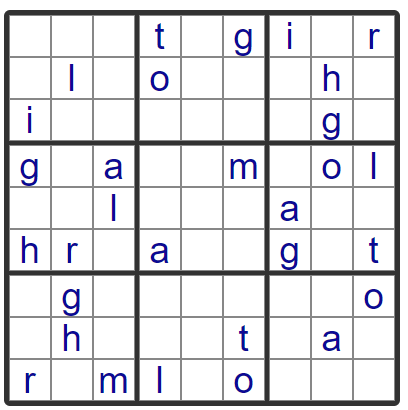
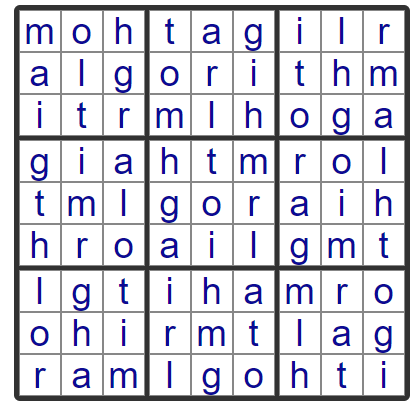

#Questions
**Question 1**: Implement the Backtracking Search with Constraint Propagation which can solve any Wordoku puzzle given as input. Mention your choice of heuristics in Backtracking Search. [**15 marks**]

**Question 2**: Implement the Min_Conflict Search which can solve any Wordoku puzzle given as input.
[**15 marks**]

**Question 3**: State the time and space complexity for each algorithm. Also, provide a table that compares performance of the above two algorithms for each 5 input cases.

Performance metrics: 
* The total clock time, 
* the search clock time, 
* the number of nodes generated

Analyze your results to see if the behaviour you expected has been achieved or not, and why.
[**10 marks**]

**Question 4**: Find all the possible meaningful words formed in any row, column or diagonal in each test case and list them in the output. (If none possible, mention ‘None’ in output) You may want to explore python libraries that can help you with finding meaningful words. [**10 marks**]

## Puzzle Input Format
\"*" denotes empty cells and letters denote the occupied cells.

\* D * * * * A G I \
\* * B * * H * E D \
\* * F * * E * * H \
\* H * * G * I A * \
\* E * * I * * C * \
\* A I * F * * D * \
C * * D * * G * * \
E G * A * * B * * \
I B H * * * * F * \

In [ ]:
''' Input File Format 
    ## will be seperator for multiple test case inputs 

    google drive is mounted in notebook and input file named as inp.txt is uploaded to drive in CollabNotebooks folder and path is mentioned
'''  


'''
##
*D****AGI
**B**H*ED
**F**E**H
*H**G*IA*
*E**I**C*
*AI*F**D*
C**D**G**
EG*A**B**
IBH****F*
##
*D****AGI
**B**H*ED
**F**E**H
*H**G*IA*
*E**I**C*
*AI*F**D*
C**D**G**
EG*A**B**
IBH****F*
##
'''

'\n##\n*D****AGI\n**B**H*ED\n**F**E**H\n*H**G*IA*\n*E**I**C*\n*AI*F**D*\nC**D**G**\nEG*A**B**\nIBH****F*\n##\n*D****AGI\n**B**H*ED\n**F**E**H\n*H**G*IA*\n*E**I**C*\n*AI*F**D*\nC**D**G**\nEG*A**B**\nIBH****F*\n##\n'

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

Mounted at /content/MyDrive


In [ ]:
from timeit import default_timer as timer
with open('/content/MyDrive/MyDrive/Colab Notebooks/inp.txt') as f:
    lines = [line.rstrip('\n') for line in f]

print(lines)

print(len(lines))


seperator = '##'
wordoku_list = []
c = ''

for content in lines:
    if content == seperator:
        if len(c) != 0:
            wordoku_list.append(c)
            c = ''
    else:
        c = c + content

print(wordoku_list)


sudoku_list = []
wordoku_map_list = []

character_mapping = {}

w = '*D****AGI**B**H*ED**F**E**H*H**G*IA**E**I**C**AI*F**D*C**D**G**EG*A**B**IBH****F*'

def checkKey(dict, key):
      
    if key in dict.keys():
        # print("Present, ", end =" ")
        # print("value =", dict[key])
        return True
    else:
        # print("Not present")
        return False



def generate_mapping(wordoku = w):

    character_mapping = {}
    r = 1
    for letter in wordoku:
        if( letter != '*' and checkKey(character_mapping,letter) == False):
            character_mapping[letter] = str(r)
            r += 1

    return character_mapping


def degenerate_mapping(res,algo,character_mapping):

    inv_map = {v: k for k, v in character_mapping.items()}

    if algo == 'backtracking':

        l = list(res.values())
        backtrack_res = []
        n = 9
        x = [l[i * n:(i + 1) * n] for i in range((len(l) + n - 1) // n )] 
        print("x = ",x)
        
        for i in range(9):
            for j in range(9):
                x[i][j] = inv_map[x[i][j]]
        # print("x = ",x)

        return x
        
    else:

        for i in range(9):
            for j in range(9):
                res[i][j] = inv_map[str(res[i][j])]

        return res




character_mapping = generate_mapping(w)

print('character_mapping',character_mapping)

for wordoku in wordoku_list:
    # wordoku = w.replace('*','.')
    sudoku = []
    character_mapping = generate_mapping(wordoku)
    for i in range(len(wordoku)):
        if wordoku[i] != '*':
            
            sudoku.append(character_mapping[wordoku[i]])
        else :
            sudoku.append('.')
    # print('sudoku',sudoku)
    sudoku_list.append(''.join(sudoku))
    wordoku_map_list.append(character_mapping)
    
print('sudoku_list',sudoku_list)
print('wordoku_map_list',wordoku_map_list)


['##', '*D****AGI', '**B**H*ED', '**F**E**H', '*H**G*IA*', '*E**I**C*', '*AI*F**D*', 'C**D**G**', 'EG*A**B**', 'IBH****F*', '##', '***t*gi*r', '*l*o***h*', 'i******g*', 'g*a**m*ol', '**l***a**', 'hr*a**g*t', '*g******o', '*h***t*a*', 'r*ml*o***', '##', '*ih*r*gl*', 'm********', '*****a*ti', 't****i*o*', '***m*r***', '*a*g****h', 'rg*l*****', '********l', '*hi*t*oa*', '##', 'hma*glt**', '*r*tm**a*', 'i******lo', '**r***ioa', '***m*h***', 'glt***r**', 'oi******l', '*g**ar*m*', '**lio*hgt', '##', '*g*ra*oi*', 'o****ha**', '*t***gr*l', '**t*i**ro', 'i**g*r**h', 'am**h*g**', 'h*go***m*', '**lm****r', '*om*la*t*', '##']
51
['*D****AGI**B**H*ED**F**E**H*H**G*IA**E**I**C**AI*F**D*C**D**G**EG*A**B**IBH****F*', '***t*gi*r*l*o***h*i******g*g*a**m*ol**l***a**hr*a**g*t*g******o*h***t*a*r*ml*o***', '*ih*r*gl*m*************a*tit****i*o****m*r****a*g****hrg*l*************l*hi*t*oa*', 'hma*glt***r*tm**a*i******lo**r***ioa***m*h***glt***r**oi******l*g**ar*m***lio*hgt', '*g*ra*oi*o****ha***t***gr*l**t*i*

# Results & Observations 

* Heuristic implemented here Candidate Selection with Uniqueness in units.
* Candidate Selection refers to a value is being set to a cell, then it can’t be set to any other cells of its units.
* Uniquness in units refers to  a candidate is legal in only one of the unit cells, then it can be safely nailed to this cell.
* Both heursitic taken from online Norvig material which is followed in course 
Reference Acknowleged  from 'https://norvig.com/' for units and peers technique 




In [ ]:
# def world_init():
#     wordoku = np.empty([9, 9])

#     print(wordoku)


# world_init()

# Backtracking 

In [ ]:



def generate_cells(rows, columns):
    cells = []
    for r in rows:
        for c in columns:
            cells.append(r+c)
    return cells


def generate_row_constraints(rows, cols):
    row_constraints = []
    for r in rows:
        row_constraints.append(generate_cells(r, cols))
    return row_constraints


def generate_cols_constraints(rows, cols):
    cols_constraints = []
    for c in cols:
        cols_constraints.append(generate_cells(rows, c))
    return cols_constraints


def generate_subgrid_constraints(rows, cols):
    subgrid_constraints = []
    for rs in ('ABC', 'DEF', 'GHI'):
        for cs in ('123', '456', '789'):
            subgrid_constraints.append(generate_cells(rs, cs))
    return subgrid_constraints


def get_alldiff_constraints(rows, cols):
    row_constraints = generate_row_constraints(rows, cols)
    cols_constraints = generate_cols_constraints(rows, cols)
    subgrid_constraints = generate_subgrid_constraints(rows, cols)
    return row_constraints + cols_constraints + subgrid_constraints


digits = '123456789'
rows = 'ABCDEFGHI'


cols = digits
cells = generate_cells(rows, cols)
alldiff_constraints = get_alldiff_constraints(rows, cols)
units = dict((s, [u for u in alldiff_constraints if s in u])for s in cells)
# print( 'units',units )
peers = dict((s, set(sum(units[s], []))-set([s]))for s in cells)
# print( 'peers', peers )


def parse_grid(grid):
    """Convert grid to a dict of possible values, {square: digits}, or
    return False if a contradiction is detected."""
    # To start, every square can be any digit; then assign values from the grid.
    values = dict((s, digits) for s in cells)
    # print('values',values)
    # print('grid_values',grid_values(grid).items())

    for s, d in grid_values(grid).items():

        if d in digits:
            values[s] = d

        # if d in digits and not assign(values, s, d):
        #     return False ## (Fail if we can't assign d to square s.)

    # print('values',values)
    return values


def grid_values(grid):
    "Convert grid into a dict of {square: char} with '0' or '.' for empties."
    chars = [c for c in grid if c in digits or c in '0.']
    assert len(chars) == 81
    return dict(zip(cells, chars))


def assign(values, s, d):
    """Eliminate all the other values (except d) from values[s] and propagate.
    Return values, except return False if a contradiction is detected."""

    # print('s',s)
    # print('d',d)
    other_values = values[s].replace(d, '')
    # print('other values',other_values)
    if all(eliminate(values, s, d2) for d2 in other_values):
        return values
    else:
        return False


def eliminate(values, s, d):
    """Eliminate d from values[s]; propagate when values or places <= 2.
    Return values, except return False if a contradiction is detected."""
    if d not in values[s]:
        return values  # Already eliminated
    values[s] = values[s].replace(d, '')
    # (1) If a square s is reduced to one value d2, then eliminate d2 from the peers.
    if len(values[s]) == 0:
        return False  # Contradiction: removed last value
    elif len(values[s]) == 1:
        d2 = values[s]
        if not all(eliminate(values, s2, d2) for s2 in peers[s]):
            return False
    # (2) If a unit u is reduced to only one place for a value d, then put it there.
    for u in units[s]:
        dplaces = [s for s in u if d in values[s]]
        if len(dplaces) == 0:
            return False  # Contradiction: no place for this value
        elif len(dplaces) == 1:
            # d can only be in one place in unit; assign it there
            if not assign(values, dplaces[0], d):
                return False
    return values


# def display(values):
#     "Display these values as a 2-D grid."
#     width = 1+max(len(values[s]) for s in cells)
#     line = '+'.join(['-'*(width*3)]*3)
#     for r in rows:
#         print('').join(values[r+c].center(width)+('|' if c in '36' else '')
#                        for c in cols)
#         if r in 'CF':
#             print(line)
#     print


def solved(values):
    # print('values',values)
    "A puzzle is solved if each unit is a permutation of the digits 1 to 9."
    def unitsolved(unit): return set(values[s] for s in unit) == set(digits)
    return values is not False and all(unitsolved(unit) for unit in alldiff_constraints)


In [ ]:

def is_goal_state(state):
    return solved(state)


def get_successors(state):
    """
        state: Search state
    For a given state, this should return a list of triples, (successor(Dict),
    action, stepCost), where 'successor' is a successor to the current
    state, 'action' is the action required to get there, and 'stepCost' is
    the incremental cost of expanding to that successor.
    Note : Do check if the return dict of assign is not False while calculating the successors
    """
    successors = []

    length = []
    for square in state:
        # print('square',square)
        l = len(state[square])
        if l > 1:
            length.append(l)
    minLength = min(length)
    for square in state:
        if len(state[square]) == minLength:
            choices = state[square]
            # print('choices , square ',choices,square)
            # print('square',square)
            for choice in choices:
                newstate = state.copy()
                if not (assign(newstate, square, choice) == False):
                    successors.append((newstate, (square, choice), 1))
            break
    return successors

In [ ]:
def already_visited(visited, key):
    # print('key',key)
    if key in visited.keys():
        print('key found')
        return True
    else:
        return False

In [ ]:
from queue import deque
def backtracking_search(grid):
    start_state = parse_grid(grid)
    print('start state', start_state)
    came_from = {frozenset(start_state.items()): None}
    dfs_stack = deque([])
    visited = {}
    dfs_stack.append(start_state)
    visited[frozenset(start_state.items())] = True
    explored_nodes = set([])

    time_start = timer()
    while len(dfs_stack) > 0:
        curr_state = dfs_stack.pop()
        # print( 'curr_state',type(curr_state))
        explored_nodes.add(frozenset(curr_state.items()))
        if(is_goal_state(curr_state)):
            print('goal state reached ', curr_state)
            time_end = timer()
            return curr_state, explored_nodes,time_end-time_start
        child_states = get_successors(curr_state)
        # print( 'child_states',child_states)

        for child in child_states:
            # print('child',child[0])
            # print(frozenset(child[0].items()))
            if already_visited(visited, frozenset(child[0].items())) == False:
                dfs_stack.append(child[0])
                visited[frozenset(child[0].items())] = True
                came_from[frozenset(child[0].items())] = curr_state

    
    

  ###
#   your code goes here. insert the becktracking search code in this cell /
  ###

In [ ]:
# for sudoku in sudoku_list:
result, explored_nodes, search_time = backtracking_search(sudoku_list[0])
print(result)
print(len(explored_nodes))

c = wordoku_map_list[0]
final = degenerate_mapping(result,'backtracking',c)

print('final',final)

for i in range(9):
    # for j in range(9):
        print(final[i])
    # print("/n")


start state {'A1': '123456789', 'A2': '1', 'A3': '123456789', 'A4': '123456789', 'A5': '123456789', 'A6': '123456789', 'A7': '2', 'A8': '3', 'A9': '4', 'B1': '123456789', 'B2': '123456789', 'B3': '5', 'B4': '123456789', 'B5': '123456789', 'B6': '6', 'B7': '123456789', 'B8': '7', 'B9': '1', 'C1': '123456789', 'C2': '123456789', 'C3': '8', 'C4': '123456789', 'C5': '123456789', 'C6': '7', 'C7': '123456789', 'C8': '123456789', 'C9': '6', 'D1': '123456789', 'D2': '6', 'D3': '123456789', 'D4': '123456789', 'D5': '3', 'D6': '123456789', 'D7': '4', 'D8': '2', 'D9': '123456789', 'E1': '123456789', 'E2': '7', 'E3': '123456789', 'E4': '123456789', 'E5': '4', 'E6': '123456789', 'E7': '123456789', 'E8': '9', 'E9': '123456789', 'F1': '123456789', 'F2': '2', 'F3': '4', 'F4': '123456789', 'F5': '8', 'F6': '123456789', 'F7': '123456789', 'F8': '1', 'F9': '123456789', 'G1': '9', 'G2': '123456789', 'G3': '123456789', 'G4': '1', 'G5': '123456789', 'G6': '123456789', 'G7': '3', 'G8': '123456789', 'G9': '12

# Result & Observation :

# MinConflict

In [ ]:
import random
import sys

In [ ]:
# Check if a number can be put in a cell
size = 9
sub_column_size = 3 # 3 columns in each submatrix
sub_row_size = 3 # 3 rows in each submatrix
def is_consistent(number:int, row:int, column:int,state) -> bool:
    # Check a row
    for x in range(size):
        # Return false if the number exists in the row
        if (x != column and state[row][x] == number):
            return False
    # Check a column
    for y in range(size):
        
        # Return false if the number exists in the column
        if (y != row and state[y][column] == number):
            return False
    # Calculate row start and column start
    row_start = (row//sub_row_size)*sub_row_size
    col_start = (column//sub_column_size)*sub_column_size
    # Check sub matrix
    for y in range(row_start, row_start+sub_row_size):
        for x in range(col_start, col_start+sub_column_size):
            
            # Return false if the number exists in the submatrix
            if (y != row and x != column and state[y][x]== number):
                return False
    # Return true if no conflicts has been found
    return True

In [ ]:
# Update domains for cells
def update_domains(state,size):
    # Reset domains
    domains = {}
    
    # Create an array with numbers
    numbers = []
    # Loop the state (puzzle or grid)
    for y in range(size):
        for x in range(size):
            
            # Check if a cell is empty
            if (state[y][x] == 0):
                # Loop all possible numbers
                numbers = []
                for number in range(1, size + 1):
                    # Check if the number is consistent
                    if(is_consistent(number, y, x,state) == True):
                        numbers.append(number)
                # Add numbers to a domain
                if(len(numbers) > 0):
                    domains[(y, x)] = numbers

    return domains

In [ ]:
size = 9
# Calculate number of conflicts
def number_of_conflicts(number:int, row:int, column:int,state,domains) -> int:
    # Number of conflicts
    number_of_conflicts = 0
    # Check a row
    for x in range(size):
        # Check if a conflict is found in a row
        if (x != column and state[row][x] == number):
            number_of_conflicts += 1
    # Check a column
    for y in range(size):
        
        # Check if a conflict is found in a column
        if (y != row and state[y][column] == number):
            number_of_conflicts += 1
    # Calculate row start and column start
    row_start = (row//sub_row_size)*sub_row_size
    col_start = (column//sub_column_size)*sub_column_size
    # Check sub matrix
    for y in range(row_start, row_start+sub_row_size):
        for x in range(col_start, col_start+sub_column_size):
            
            # Check if a conflict is found in a submatrix
            if (y != row and x != column and state[y][x]== number):
                number_of_conflicts += 1
    # Return the number of conflicts
    return number_of_conflicts


In [ ]:
# Create an initial solution
def create_initial_solution(state,domains):
    
    # Generate an initial solution (probably with conflicts)
    for (y,x), numbers in domains.items():
        # A dictionary to store numbers and the number of conflicts for each number
        scores = {}
        # Loop numbers
        for number in numbers:
            # Add to conflicts dictionary
            scores[number] = number_of_conflicts(number, y, x,state,domains)
        # Sort scores on number of conflicts
        scores = {key: value for key, value in sorted(scores.items(), key=lambda item: item[1])}
        # Get best numbers
        best_numbers = []
        min = sys.maxsize
        for key, value in scores.items():
            # Add a number if it is less or equal to current minimum
            if(value <= min):
                best_numbers.append(key)
                min = value
        # Assign a number at random (one of the best numbers)
        state[y][x] = random.choice(best_numbers)
    # Print initial solution
    # print('\nInitial solution:')
    # print_state(state,9)
    # print()

    return state

In [ ]:
from timeit import default_timer as timer

 # Min-conflicts algorithm '''
def min_conflicts(state,domains, var_rate=0.04, val_rate=0.02, max_steps=100000) -> bool:
    # Generate an initial solution (probably with conflicts)
    state = create_initial_solution(state,domains)

    print('initial solution state',state)
    # Now repeatedly choose a random variable in conflict and change it

    time_start = timer()
    for i in range(max_steps):
        
        # Variables
        conflicts = []
        conflict_count = 0
        # Get all variables that are in conflict
        for (y,x), numbers in domains.items():
            # Check if the number is consistent
            if(is_consistent(state[y][x],y,x,state) == False):
                
                # Add the cell
                conflicts.append((y,x))
                # Add to the conflict count
                conflict_count += 1
            # Add at random to be able to jump out from a local minimum
            elif (random.random() < var_rate):
                # Add the cell
                conflicts.append((y,x))
        # Check if we have a valid solution
        if(conflict_count <= 0):
            print("i = ",i)
            time_end = timer()
            return True,state,i,time_end-time_start
        # Select a cell in conflict at random
        y, x = random.choice(conflicts)
        # Get numbers to chose from
        numbers = domains.get((y, x))
        # Loop numbers
        scores = {}
        for number in numbers:
            # Add the number of conflicts as a score
            scores[number] = number_of_conflicts(number, y, x,state,domains)
        # Sort scores on value
        scores = {key: value for key, value in sorted(scores.items(), key=lambda item: item[1])}
        
        # Get best numbers
        best_numbers = []
        min = sys.maxsize
        for key, value in scores.items():
            # Add a number if it is less or equal to current minimum
            if (value <= min):
                best_numbers.append(key)
                min = value
            # Add at random to be able to jump out from local minimum
            elif (random.random() < val_rate):
                best_numbers.append(key)
        # Assign a number
        state[y][x] = random.choice(best_numbers)
    # No solution was found, return false
    time_end = timer()
    return False,state,i,time_end-time_start

In [ ]:
def convert_grid(str):
    l = len(str)
    k = 0
    row = 9
    column = 9
    if (row * column < l):
        row = column


    board = []
    k = 0
    for i in range(row):
        r=[]
        for j in range(column):
            # print('j = ',str[j])
            if( str[k] == '.'):
                r.append(0)
            else:
                r.append(int(str[k]))
            k = k+1
        board.append(r)
    
    # print('board')
    # print( board )

    return board

In [ ]:
# for sudoku_inp in sudoku_list:
sudoku = convert_grid(sudoku_list[0])


print('sudoku',sudoku)

var_rate = 0.02
val_rate = 0.03
max_steps = 200000

domains = update_domains(sudoku,9)
print('domains',domains)

success,res_minconflict,explored_nodes_minconflict,minconflict_search_time = min_conflicts(sudoku,domains,var_rate, val_rate, max_steps)

print('res_minconflict',res_minconflict);

c = wordoku_map_list[0]
final = degenerate_mapping(res_minconflict,'minconflict',c)

print('final',final)

for i in range(9):
    # for j in range(9):
        print(final[i])


sudoku [[0, 1, 0, 0, 0, 0, 2, 3, 4], [0, 0, 5, 0, 0, 6, 0, 7, 1], [0, 0, 8, 0, 0, 7, 0, 0, 6], [0, 6, 0, 0, 3, 0, 4, 2, 0], [0, 7, 0, 0, 4, 0, 0, 9, 0], [0, 2, 4, 0, 8, 0, 0, 1, 0], [9, 0, 0, 1, 0, 0, 3, 0, 0], [7, 3, 0, 2, 0, 0, 5, 0, 0], [4, 5, 6, 0, 0, 0, 0, 8, 0]]
domains {(0, 0): [6], (0, 2): [7, 9], (0, 3): [5, 8, 9], (0, 4): [5, 9], (0, 5): [5, 8, 9], (1, 0): [2, 3], (1, 1): [4, 9], (1, 3): [3, 4, 8, 9], (1, 4): [2, 9], (1, 6): [8, 9], (2, 0): [2, 3], (2, 1): [4, 9], (2, 3): [3, 4, 5, 9], (2, 4): [1, 2, 5, 9], (2, 6): [9], (2, 7): [5], (3, 0): [1, 5, 8], (3, 2): [1, 9], (3, 3): [5, 7, 9], (3, 5): [1, 5, 9], (3, 8): [5, 7, 8], (4, 0): [1, 3, 5, 8], (4, 2): [1, 3], (4, 3): [5, 6], (4, 5): [1, 2, 5], (4, 6): [6, 8], (4, 8): [3, 5, 8], (5, 0): [3, 5], (5, 3): [5, 6, 7, 9], (5, 5): [5, 9], (5, 6): [6, 7], (5, 8): [3, 5, 7], (6, 1): [8], (6, 2): [2], (6, 4): [5, 6, 7], (6, 5): [4, 5, 8], (6, 7): [4, 6], (6, 8): [2, 7], (7, 2): [1], (7, 4): [6, 9], (7, 5): [4, 8, 9], (7, 7): [4, 6], (7

 # Results & Observations:

 * heuristic will be finding the minimum number of conflicts for each cell and assign values in such a way that number of conflicts are minimized for that particular assignment.

# Part 03

In [ ]:
# grid2 = '.4....179..2..8.54..6..5..8.8..7.91..5..9..3..19.6..4.3..4..7..57.1..2..928....6.'

print(sudoku_list)


algos = []
explored_nodes = []
clock_time = []
search_time = []


ans_sudoku_list = []

backtracking_results = {}
minconflict_results = {}



for index,sudoku_inp in enumerate(sudoku_list):
    sudoku = convert_grid(sudoku_inp)
    character_mapping = wordoku_map_list[index]

    print('sudoku',sudoku)

    var_rate = 0.02
    val_rate = 0.03
    max_steps = 200000

    # domains = {}
    domains = update_domains(sudoku,9)
    print('domains',domains)

    backtrack_time_start = timer()
    res_backtrack,explored_nodes_backtrack,backtrack_search_time = backtracking_search(sudoku_inp)

    print('res_backtrack',res_backtrack.values())
    
    final_backtrack = degenerate_mapping(res_backtrack,'backtracking', character_mapping)
    # l = list(res_backtrack.values())

    # backtrack_res = []
    # n = 9
    # x = [l[i * n:(i + 1) * n] for i in range((len(l) + n - 1) // n )] 

    # print("x = ",x)
    
    # for i in range(9):
    #     for j in range(9):
    #         x[i][j] = inv_map[x[i][j]]

    print("x = ",final)

    backtracking_results[index] = final_backtrack
    
    
    
    


    algos.append('backtracking_search')
    explored_nodes.append(len(explored_nodes_backtrack))


    search_time.append(backtrack_search_time)
    backtrack_time_end = timer()

    clock_time.append(backtrack_time_end - backtrack_time_start)
    


    minconflict_time_start = timer()
    success,res_minconflict,explored_nodes_minconflict,minconflict_search_time = min_conflicts(sudoku,domains,var_rate, val_rate, max_steps)
    search_time.append(minconflict_search_time)

    final_minconflict = degenerate_mapping(res_minconflict,'minconflict', character_mapping)

    minconflict_results[index] = final_minconflict
    # print('final = ',final)
    algos.append('minconflict')
    explored_nodes.append(explored_nodes_minconflict)
    minconflict_time_end = timer()
    clock_time.append(minconflict_time_end - minconflict_time_start)
    

    

    

    

['.1....234..5..6.71..8..7..6.6..3.42..7..4..9..24.8..1.9..1..3..73.2..5..456....8.', '...1.23.4.5.6...7.3......2.2.8..9.65..5...8..74.8..2.1.2......6.7...1.8.4.95.6...', '.12.3.45.6.............7.818....1.9....6.3....7.4....234.5.............5.21.8.97.', '123.456...7.62..3.8......59..7...893...2.1...456...7..98......5.4..37.2...589.146', '.1.23.45.4....63...7...12.8..7.5..245..1.2..639..6.1..6.14...9...89....2.49.83.7.']
sudoku [[0, 1, 0, 0, 0, 0, 2, 3, 4], [0, 0, 5, 0, 0, 6, 0, 7, 1], [0, 0, 8, 0, 0, 7, 0, 0, 6], [0, 6, 0, 0, 3, 0, 4, 2, 0], [0, 7, 0, 0, 4, 0, 0, 9, 0], [0, 2, 4, 0, 8, 0, 0, 1, 0], [9, 0, 0, 1, 0, 0, 3, 0, 0], [7, 3, 0, 2, 0, 0, 5, 0, 0], [4, 5, 6, 0, 0, 0, 0, 8, 0]]
domains {(0, 0): [6], (0, 2): [7, 9], (0, 3): [5, 8, 9], (0, 4): [5, 9], (0, 5): [5, 8, 9], (1, 0): [2, 3], (1, 1): [4, 9], (1, 3): [3, 4, 8, 9], (1, 4): [2, 9], (1, 6): [8, 9], (2, 0): [2, 3], (2, 1): [4, 9], (2, 3): [3, 4, 5, 9], (2, 4): [1, 2, 5, 9], (2, 6): [9], (2, 7): [5], (3, 0): [1, 5, 8], (3, 2)

In [ ]:
df = pd.DataFrame({ 'Algos': algos, 'Search Time': search_time, 'Clock Time': clock_time,  'Explored Nodes': explored_nodes , })

df.head(10)

,Algos,Search Time,Clock Time,Explored Nodes
0,backtracking_search,0.026053,0.027053,37
1,minconflict,0.231796,0.233666,861
2,backtracking_search,0.023127,0.024916,44
3,minconflict,1.437756,1.438989,4959
4,backtracking_search,0.647579,0.669009,1166
5,minconflict,13.621951,13.625465,44058
6,backtracking_search,0.016320,0.017838,16
7,minconflict,0.780308,0.781058,2957
8,backtracking_search,0.023886,0.024765,35
9,minconflict,0.058453,0.060659,227


# Result & Observation: 

* Minconflict Algorithm has more number of explored nodes as compared to Backtracking search.
*  min-conflict algorithm takes much more average time than backtracking with constraint propagation.
* The time complexity of Backtraking with constraint propagation of cd^9 where c is a binary constraint and d is the number of times a constraint will be inserted in the queue.
* The time complexity of min-conflict algorithm, time complexity will be d^n, where d is domain size and n is the number of blank space or variables in the sudoku game.




In [ ]:


for x in backtracking_results:
    # print (x)
    # for y in backtracking_results[x]:

    print('test case : ',x)
    # vis(backtracking_results[x])
    print(np.array(backtracking_results[x]))

test case :  0
[['H' 'D' 'E' 'F' 'C' 'B' 'A' 'G' 'I']
 ['G' 'C' 'B' 'I' 'A' 'H' 'F' 'E' 'D']
 ['A' 'I' 'F' 'G' 'D' 'E' 'C' 'B' 'H']
 ['F' 'H' 'C' 'E' 'G' 'D' 'I' 'A' 'B']
 ['D' 'E' 'G' 'B' 'I' 'A' 'H' 'C' 'F']
 ['B' 'A' 'I' 'H' 'F' 'C' 'E' 'D' 'G']
 ['C' 'F' 'A' 'D' 'B' 'I' 'G' 'H' 'E']
 ['E' 'G' 'D' 'A' 'H' 'F' 'B' 'I' 'C']
 ['I' 'B' 'H' 'C' 'E' 'G' 'D' 'F' 'A']]
test case :  1
[['m' 'o' 'h' 't' 'a' 'g' 'i' 'l' 'r']
 ['a' 'l' 'g' 'o' 'r' 'i' 't' 'h' 'm']
 ['i' 't' 'r' 'm' 'l' 'h' 'o' 'g' 'a']
 ['g' 'i' 'a' 'h' 't' 'm' 'r' 'o' 'l']
 ['t' 'm' 'l' 'g' 'o' 'r' 'a' 'i' 'h']
 ['h' 'r' 'o' 'a' 'i' 'l' 'g' 'm' 't']
 ['l' 'g' 't' 'i' 'h' 'a' 'm' 'r' 'o']
 ['o' 'h' 'i' 'r' 'm' 't' 'l' 'a' 'g']
 ['r' 'a' 'm' 'l' 'g' 'o' 'h' 't' 'i']]
test case :  2
[['a' 'i' 'h' 't' 'r' 'm' 'g' 'l' 'o']
 ['m' 'o' 't' 'i' 'g' 'l' 'h' 'r' 'a']
 ['g' 'r' 'l' 'o' 'h' 'a' 'm' 't' 'i']
 ['t' 'm' 'g' 'h' 'l' 'i' 'a' 'o' 'r']
 ['h' 'l' 'o' 'm' 'a' 'r' 't' 'i' 'g']
 ['i' 'a' 'r' 'g' 'o' 't' 'l' 'm' 'h']
 ['r' 'g' 'a' 'l'

In [ ]:
for x in minconflict_results:
    # print (x)
    # for y in backtracking_results[x]:

    print('test case : ',x)
    # vis(minconflict_results[x])
    print(np.array(minconflict_results[x]))

test case :  0
[['H' 'D' 'E' 'F' 'C' 'B' 'A' 'G' 'I']
 ['G' 'C' 'B' 'I' 'A' 'H' 'F' 'E' 'D']
 ['A' 'I' 'F' 'G' 'D' 'E' 'C' 'B' 'H']
 ['F' 'H' 'C' 'E' 'G' 'D' 'I' 'A' 'B']
 ['D' 'E' 'G' 'B' 'I' 'A' 'H' 'C' 'F']
 ['B' 'A' 'I' 'H' 'F' 'C' 'E' 'D' 'G']
 ['C' 'F' 'A' 'D' 'B' 'I' 'G' 'H' 'E']
 ['E' 'G' 'D' 'A' 'H' 'F' 'B' 'I' 'C']
 ['I' 'B' 'H' 'C' 'E' 'G' 'D' 'F' 'A']]
test case :  1
[['m' 'o' 'h' 't' 'a' 'g' 'i' 'l' 'r']
 ['a' 'l' 'g' 'o' 'r' 'i' 't' 'h' 'm']
 ['i' 't' 'r' 'm' 'l' 'h' 'o' 'g' 'a']
 ['g' 'i' 'a' 'h' 't' 'm' 'r' 'o' 'l']
 ['t' 'm' 'l' 'g' 'o' 'r' 'a' 'i' 'h']
 ['h' 'r' 'o' 'a' 'i' 'l' 'g' 'm' 't']
 ['l' 'g' 't' 'i' 'h' 'a' 'm' 'r' 'o']
 ['o' 'h' 'i' 'r' 'm' 't' 'l' 'a' 'g']
 ['r' 'a' 'm' 'l' 'g' 'o' 'h' 't' 'i']]
test case :  2
[['a' 'i' 'h' 't' 'r' 'm' 'g' 'l' 'o']
 ['m' 'o' 't' 'i' 'g' 'l' 'h' 'r' 'a']
 ['g' 'r' 'l' 'o' 'h' 'a' 'm' 't' 'i']
 ['t' 'm' 'g' 'h' 'l' 'i' 'a' 'o' 'r']
 ['h' 'l' 'o' 'm' 'a' 'r' 't' 'i' 'g']
 ['i' 'a' 'r' 'g' 'o' 't' 'l' 'm' 'h']
 ['r' 'g' 'a' 'l'

# 4. Meaningful words 

In [ ]:
def all_possible_strings(sudoku_res):

    row_strings = []
    column_strings = []
    diagonal_strings = []
    sudoku = np.array(sudoku_res)

    
#   print("\n")

    # for i in range(9):
    #     col = sudoku[:,i]
    #     column_strings.append(''.join(col))
    # for x in range(9):
    #     row_strings.append(''.join(sudoku_res[x]))



    max_col = 9
    max_row = 9
    columns = [[] for _ in range(max_col)]
    rows = [[] for _ in range(max_row)]
    fdiag = [[] for _ in range(max_row + max_col - 1)]
    bdiag = [[] for _ in range(len(fdiag))]
    min_bdiag = -max_row + 1

    for x in range(max_col):
        for y in range(max_row):
            columns[x].append(sudoku_res[y][x])
            rows[y].append(sudoku_res[y][x])
            fdiag[x+y].append(sudoku_res[y][x])
            bdiag[x-y-min_bdiag].append(sudoku_res[y][x])

    # print(cols)
    # print(rows)
    # print(fdiag)
    # print(bdiag)
    

    return columns,rows,fdiag,bdiag
    # print('row_strings',row_strings)

    # print('column_strings',column_strings)

    # print('diagonal_strings',diagonal_strings)

    
# print(row_strings)


In [ ]:
!pip install pyenchant && sudo apt-get install python-enchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-enchant is already the newest version (2.0.0-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from nltk import everygrams
import enchant

d = enchant.Dict("en_US")

sudoku_results = backtracking_results



# for x in range(len(sudoku_results)):

for x in sudoku_results.keys():

    c = sudoku_results[x]

    print('######################################################################################################################')
    print("sudoku test case : ", x)
    columns,rows,forward_diagonals,backward_diagonal = all_possible_strings(c)


    print('all possible words in each row of sudoku')
    for r in rows:
        word = ''.join(r)
        # print('r_s',r_s)
        
        rr = [''.join(_ngram) for _ngram in everygrams(word) if d.check(''.join(_ngram)) and len(_ngram) > 1]

        if (len(rr) == 0):
            print("None")
        else:
            print(rr)

    # print('cols',columns)
    print('all possible words in each columns of sudoku')
    for r in columns:
        word = ''.join(r)
        # print('r_s',r_s)
        
        rr = [''.join(_ngram) for _ngram in everygrams(word) if d.check(''.join(_ngram)) and len(_ngram) > 1]

        if (len(rr) == 0):
            print("None")
        else:
            print(rr)
    
    print('all possible words in each forward diagonals of sudoku')
    for r in forward_diagonals:
        word = ''.join(r)
        # print('r_s',r_s)
        
        rr = [''.join(_ngram) for _ngram in everygrams(word) if d.check(''.join(_ngram)) and len(_ngram) > 1]

        if (len(rr) == 0):
            print("None")
        else:
            print(rr)

    print('all possible words in each backward diagonals of sudoku')
    for r in backward_diagonal:
        word = ''.join(r)
        # print('r_s',r_s)
        
        rr = [''.join(_ngram) for _ngram in everygrams(word) if d.check(''.join(_ngram)) and len(_ngram) > 1]

        if (len(rr) == 0):
            print("None")
        else:
            print(rr)


    print('###############################################################################################################')

######################################################################################################################
sudoku test case :  0
all possible words in each row of sudoku
['DE', 'CB', 'BA', 'AG', 'GI', 'DEF', 'BAG']
['CB', 'BI', 'IA', 'AH', 'HF', 'FE', 'ED', 'BIA', 'FED']
['AI', 'IF', 'GD', 'DE', 'EC', 'CB', 'DEC']
['CE', 'GD', 'DI', 'IA', 'AB']
['DE', 'GB', 'BI', 'IA', 'AH', 'CF', 'DEG', 'BIA']
['BA', 'AI', 'HF', 'CE', 'ED']
['CF', 'FA', 'AD', 'DB', 'BI', 'HE', 'FAD', 'BIG']
['GD', 'DA', 'AH', 'HF', 'BI', 'FBI', 'BIC']
['CE', 'GD', 'FA']
all possible words in each columns of sudoku
['HG', 'GA', 'AF', 'FD', 'DB', 'BC', 'CE']
['DC', 'CI', 'HE', 'EA', 'AF', 'GB']
['BF', 'CG', 'GI', 'IA', 'AD', 'DH', 'CGI']
['GE', 'DA', 'AC', 'FIG']
['CA', 'AD', 'GI', 'IF', 'HE', 'CAD', 'GIF']
['HE', 'ED', 'DA', 'AC', 'CI', 'IF']
['AF', 'CI', 'HE', 'GB', 'AFC']
['GE', 'BA', 'AC', 'CD', 'DH', 'HI', 'IF']
['ID', 'DH', 'BF', 'GE', 'EC', 'CA']
all possible words in each forward diagonals of sudoku


In [ ]:
# def find_meaningful words():
#   #####
#   # your code goes here. implrt a dictionay and match the words in the rows, columns and diagonals /
#   #####
#   pass